# Assignment 5(due on 12/20)

## Student:姜天赐（12332290），Gtihub：Tcjiang2023
## 批改人：张鹏


## 得分：37/40

In [1]:
# Import modules
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
from scipy import integrate


/home/zhangp/anaconda3/lib/python3.10/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Read the csv data containing the CO2 emission data
carbon = pd.read_csv('carbon.csv')
carbon_emission = carbon.loc[(carbon['Year'] >= 1986) & (carbon['Year'] <= 2003)]['Total'].reset_index(drop=True)

1.1 Use `odeint()` to calculate the CO2 concentration from 1987 to 2004

In [3]:
# Define the functions
def model(x,t):
    fun01, fun02 = x
    gamma = carbon_emission[0]/1000/2.13

    dN1dt = -105/740*fun01 + 102/900*fun02 + gamma
    dN2dt = 105/740*fun01 - 102/900*fun02

    return [dN1dt, dN2dt]

# Define the initial conditions
x0 = [740/2.13, 900/2.13]
t = np.linspace(1987, 2004, 18)

# Solve the ODE
f1 = integrate.odeint(model, x0, t)
f1

1.2 Still use `odeint()` to calculate the CO2 concentration from 1987 to 2004 with buffer effect

In [4]:
# Define the functions
def model(x,t):
    fun01, fun02 = x
    gamma = carbon_emission[0]/1000/2.13

    dN1dt = -105/740*fun01 + 102/900*(821/2.13 + (3.69+0.0186*fun01-1.8*(1e-6)*fun01**2)*(fun02-821/2.13)) + gamma
    dN2dt = 105/740*fun01 - 102/900*(821/2.13 + (3.69+0.0186*fun01-1.8*(1e-6)*fun01**2)*(fun02-821/2.13))

    return [dN1dt, dN2dt]

# Define the initial conditions
x0 = [740/2.13, 900/2.13]
t = np.linspace(1987, 2004, 18)

# Solve the ODE
f2 = integrate.odeint(model, x0, t)
f2

array([[347.41784038, 422.53521127],
       [370.76671309, 401.80746532],
       [379.0372168 , 396.15808836],
       [383.01264649, 394.80378543],
       [385.81648514, 394.62107354],
       [388.30629679, 394.75238865],
       [390.71343452, 394.96637768],
       [393.09982329, 395.20111568],
       [395.4819426 , 395.44012312],
       [397.86415017, 395.67904231],
       [400.24758379, 395.91673546],
       [402.63253256, 396.15291345],
       [405.01905738, 396.38751539],
       [407.40716398, 396.62053555],
       [409.79684165, 396.85198464],
       [412.18807591, 397.08187715],
       [414.5808516 , 397.31022822],
       [416.97515337, 397.5370532 ]])

1.3 Plot

First read the observation data and then plot all the observation and simulation result together

In [38]:
# Read the csv data containing the CO2 observation data
with open('co2.txt' , 'r') as file:
    co2_obs = []
    for line in file:
        year = int(line[0:6])
        co2 = float(line[6:14])
        new_row = {'Year':year, 'CO2':co2}
        co2_obs.append(new_row)
co2_obs = pd.DataFrame(co2_obs)
co2_obs = co2_obs.loc[(co2_obs['Year'] >= 1987) & (co2_obs['Year'] <= 2004)]['CO2'].reset_index(drop=True)



Text(0.5, 1.0, 'CO2 Model')

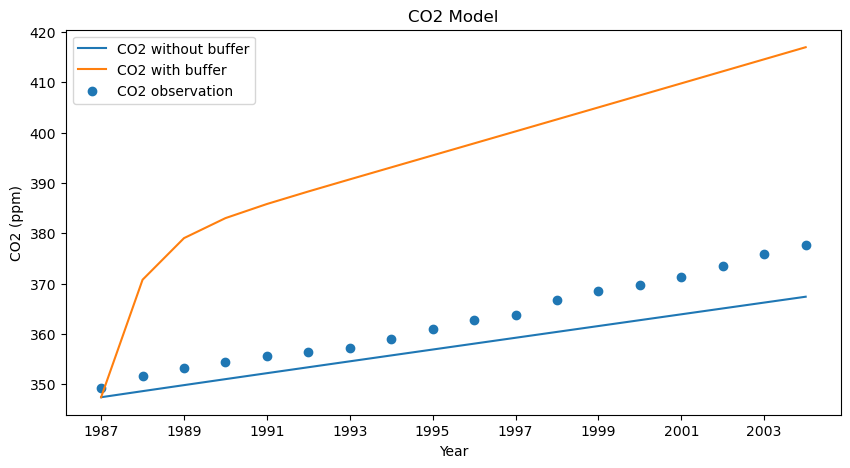

In [39]:
# Plot the CO2 with and without buffer and the observation data
plt.figure(figsize=(10,5))

t = np.linspace(1987, 2004, 18).astype(int)

# Plot the data
plt.plot(t, f1[:,0], label='CO2 without buffer')
plt.plot(t, f2[:,0], label='CO2 with buffer')
plt.scatter(t, co2_obs, label='CO2 observation')

# Add features
plt.xticks(np.arange(1987, 2005, 2))
plt.legend()
plt.xlabel('Year')
plt.ylabel('CO2 (ppm)')
plt.title('CO2 Model')

### 第一问代码思路和结果基本正确,f1[0]应该是1986年的C量;
### 第二问代码思路和结果基本正确,同第一问;
### 第三问结果基本正确，同第一问。
### 得分37/40